In [2]:
# library(tidyverse)
# library(repr)
# #library(readxl)
# library(tidymodels)
# #library(ggplot2)
# #install.packages("ggplot2")

library(tidyverse)
library(repr)
library(tidymodels)
library(rsample)
options(repr.matrix.max.rows = 6)
install.packages("ggplot2")
install.packages("GGally")
library(ggplot2)
library(GGally)

Warning message:
“package ‘ggplot2’ was built under R version 4.3.2”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_co

<font size= 5> **Predictive Analysis of Chest Pain Types: Exploring Multifactorial Influences** </font>

**Introduction**

Chest pain, also known as angina, is characterized by blockages in the blood vessels leading to one’s heart. Four types of these chest pains include typical angina, atypical angina, non-anginal pain and asymptomatic. Typical angina is a substernal chest pain caused by physical exertion while atypical angina is distinguished as epigastric pain (AlBadri et.al., 2017). In addition, non-anginal pain is not attributed to an underlying heart disease and asymptomatic chest pain is a temporary change in blood flow to the heart without typical chest pain (Rahel et.al., 2018). Whilst different, they show overlapping symptoms, such as shortness of breath and intense pain that makes it difficult to distinguish between them. Many studies have shown that age, unhealthy eating patterns, stress and more are all accompanied by a greater risk of experiencing angina (“Causes and Risk Factors”).
Questi: : What type of chest pain is most likely to occur based on their age, resting blood sugar, maximum heart rate and presence of heart disease?


In [1]:
#Reading data into notebook 

hungry <- read.csv("data/processed.hungarian.data", header = FALSE)
hungry

#Assigning column names
colnames(hungry) <- c("age", 'sex', 'chest_pain_type', 'resting_bps', 'cholestoral', 'fasting_blood_sugar', 'rest_ecg', 'max_heartrate', 'excercise_angina', 'depression', 'slope', 'major_vessels', 'thal', 'heart_disease')

#removing missing values 
hungry[hungry == "?"] <- NA

hungry_no_NA <- hungry |>
    select(age, chest_pain_type, resting_bps, cholestoral, max_heartrate, heart_disease) |>
    na.omit()
hungry_no_NA

#Changing the variables into integers
hungry_select <- hungry_no_NA |>
     mutate( resting_bps = as.integer(resting_bps),cholestoral = as.integer(cholestoral), max_heartrate = as.integer(max_heartrate))
hungry_select

#Splitting the data sets into training and testing 
hungry_split <- initial_split(hungry, prop = 3/4, strata = chest_pain_type)
hungry_training <- training(hungry_split)
hungry_testing <- testing(hungry_split)

#Determing the number of rows have missing values
hungry_na <- hungry_training |> 
    select(age, chest_pain_type, resting_bps, cholestoral, max_heartrate, heart_disease) |>
    is.na()|>
    nrow()
hungry_na

#Group and Summarize the chest_pain_type
hungry_group <- hungry_training |>
    group_by(chest_pain_type) |>
    summarize(n=n())
hungry_group

#Determing the means of each predicators' columns
hungry_mean <- hungry_select|> 
        map_df(mean, na.rm = TRUE)
hungry_mean



V1 V2 V3 V4  V5  V6 V7 V8  V9 V10 V11 V12 V13 V14
1   28 1  2  130 132 0  2  185 0  0   ?   ?   ?   0  
2   29 1  2  120 243 0  0  160 0  0   ?   ?   ?   0  
3   29 1  2  140 ?   0  0  170 0  0   ?   ?   ?   0  
4   30 0  1  170 237 0  1  170 0  0   ?   ?   6   0  
5   31 0  2  100 219 0  1  150 0  0   ?   ?   ?   0  
6   32 0  2  105 198 0  0  165 0  0   ?   ?   ?   0  
7   32 1  2  110 225 0  0  184 0  0   ?   ?   ?   0  
8   32 1  2  125 254 0  0  155 0  0   ?   ?   ?   0  
9   33 1  3  120 298 0  0  185 0  0   ?   ?   ?   0  
10  34 0  2  130 161 0  0  190 0  0   ?   ?   ?   0  
11  34 1  2  150 214 0  1  168 0  0   ?   ?   ?   0  
12  34 1  2  98  220 0  0  150 0  0   ?   ?   ?   0  
13  35 0  1  120 160 0  1  185 0  0   ?   ?   ?   0  
14  35 0  4  140 167 0  0  150 0  0   ?   ?   ?   0  
15  35 1  2  120 308 0  2  180 0  0   ?   ?   ?   0  
16  35 1  2  150 264 0  0  168 0  0   ?   ?   ?   0  
17  36 1  2  120 166 0  0  180 0  0   ?   ?   ?   0  
18  36 1  3  112 340 0  0  184 0  1   2   ?   3   0  
19  36 1  3  130 209 0  0  178 0  0   ?   ?   ?   0  
20  36 1  3  150 160 0  0  172 0  0   ?   ?   ?   0  
21  37 0  2  120 260 0  0  130 0  0   ?   ?   ?   0  
22  37 0  3  130 211 0  0  142 0  0   ?   ?   ?   0  
23  37 0  4  130 173 0  1  184 0  0   ?   ?   ?   0  
24  37 1  2  130 283 0  1  98  0  0   ?   ?   ?   0  
25  37 1  3  130 194 0  0  150 0  0   ?   ?   ?   0  
26  37 1  4  120 223 0  0  168 0  0   ?   ?   3   0  
27  37 1  4  130 315 0  0  158 0  0   ?   ?   ?   0  
28  38 0  2  120 275 ?  0  129 0  0   ?   ?   ?   0  
29  38 1  2  140 297 0  0  150 0  0   ?   ?   ?   0  
30  38 1  3  145 292 0  0  130 0  0   ?   ?   ?   0  
⋮   ⋮  ⋮  ⋮  ⋮   ⋮   ⋮  ⋮  ⋮   ⋮  ⋮   ⋮   ⋮   ⋮   ⋮  
265 52 1  4  160 246 0  1  82  1  4.0 2   ?   ?   1  
266 53 1  3  145 518 0  0  130 0  0.0 ?   ?   ?   1  
267 53 1  4  180 285 0  1  120 1  1.5 2   ?   ?   1  
268 54 1  4  140 216 0  0  105 0  1.5 2   ?   ?   1  
269 55 1  1  140 295 0  ?  136 0  0.0 ?   ?   ?   1  
270 55 1  2  160 292 1  0  143 1  2.0 2   ?   ?   1  
271 55 1  4  145 248 0  0  96  1  2.0 2   ?   ?   1  
272 56 0  2  120 279 0  0  150 0  1.0 2   ?   ?   1  
273 56 1  4  150 230 0  1  124 1  1.5 2   ?   ?   1  
274 56 1  4  170 388 0  1  122 1  2.0 2   ?   ?   1  
275 58 1  2  136 164 0  1  99  1  2.0 2   ?   ?   1  
276 59 1  4  130 ?   0  0  125 0  0.0 ?   ?   ?   1  
277 59 1  4  140 264 1  2  119 1  0.0 ?   ?   ?   1  
278 65 1  4  170 263 1  0  112 1  2.0 2   ?   ?   1  
279 66 1  4  140 ?   0  0  94  1  1.0 2   ?   ?   1  
280 41 1  4  120 336 0  0  118 1  3.0 2   ?   ?   1  
281 43 1  4  140 288 0  0  135 1  2.0 2   ?   ?   1  
282 44 1  4  135 491 0  0  135 0  0.0 ?   ?   ?   1  
283 47 0  4  120 205 0  0  98  1  2.0 2   ?   6   1  
284 47 1  4  160 291 0  1  158 1  3.0 2   ?   ?   1  
285 49 1  4  128 212 0  0  96  1  0.0 ?   ?   ?   1  
286 49 1  4  150 222 0  0  122 0  2.0 2   ?   ?   1  
287 50 1  4  140 231 0  1  140 1  5.0 2   ?   ?   1  
288 50 1  4  140 341 0  1  125 1  2.5 2   ?   ?   1  
289 52 1  4  140 266 0  0  134 1  2.0 2   ?   ?   1  
290 52 1  4  160 331 0  0  94  1  2.5 ?   ?   ?   1  
291 54 0  3  130 294 0  1  100 1  0.0 2   ?   ?   1  
292 56 1  4  155 342 1  0  150 1  3.0 2   ?   ?   1  
293 58 0  2  180 393 0  0  110 1  1.0 2   ?   7   1  
294 65 1  4  130 275 0  1  115 1  1.0 2   ?   ?   1

ERROR: Error in select(hungry, age, chest_pain_type, resting_bps, cholestoral, : could not find function "select"


In the heart disease dataset we have opted not to utilize sex, fasting blood sugar, resting electrocardiographic results, exercise-induced angina, depression, and thalassemia lack as they lack direct relevance in predicting the type of chest pain. Fasting blood sugar levels reflect metabolic state, but their direct link to specific types of chest pain in heart disease is unclear. Resting electrocardiographic results provides insights into heart function but does not directly correlate with the qualitative aspects of chest pain. Exercise-induced angina, depression, sex and thalassemia do not directly predict the type of chest pain associated as they lack direct physiological links to cardiac symptoms.


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 1 row containing non-finite outside the scale range
(`stat_g_gally_count()`).”
Warning message:
“Removed 1 row containing non-finite outside the scale range
(`stat_g_gally_count()`).”
Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`stat_boxplot()`).”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 19 rows containing non-finite outside the scale range
(`stat_g_gally_count()`).”
Warning message:
“Removed 19 rows containing missing values or values outside the scale range
(`stat_boxplot()`).”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`stat_boxplot()`).”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_b

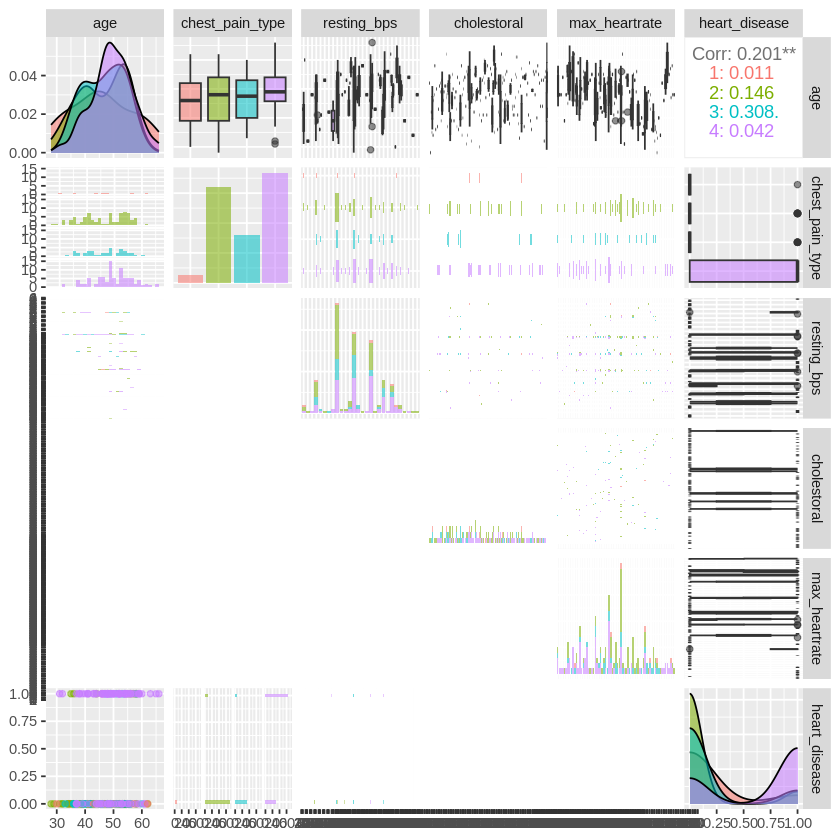

In [16]:
#Detemining the correlation between predictors 

data_ggpair <- hungry_training |>
                    select(age, chest_pain_type, resting_bps, cholestoral, max_heartrate, heart_disease)

data_ggpair$chest_pain_type = as.factor(data_ggpair$chest_pain_type)

plot <- ggpairs(data_ggpair, aes(color = chest_pain_type, alpha = 0.5), cardinality_threshold = NULL, progress = FALSE) 
        




plot

In [22]:
#Determing the number of rows have missing values
hungry_na <- hungry_training |> 
    select(age, chest_pain_type, resting_bps, cholestoral, max_heartrate, heart_disease) |>
    is.na()|>
    nrow()
hungry_na

#removing the NA values

hungry_no_NA <- hungry |>
    select(age, chest_pain_type, resting_bps, cholestoral, max_heartrate, heart_disease) |>
    na.omit()
hungry_no_NA

#Checking if any NA values remain after removal
check <- hungry_no_NA |>
            map_df(~sum(is.na(.x)))
check

[1] 220

age chest_pain_type resting_bps cholestoral max_heartrate heart_disease
1   28  2               130         132         185           0            
2   29  2               120         243         160           0            
4   30  1               170         237         170           0            
⋮   ⋮   ⋮               ⋮           ⋮           ⋮             ⋮            
292 56  4               155         342         150           1            
293 58  2               180         393         110           1            
294 65  4               130         275         115           1

age chest_pain_type resting_bps cholestoral max_heartrate heart_disease
1 0   0               0           0           0             0

In [17]:
#Changing the variables into integers
hungry_select <- hungry_no_NA |>
     mutate( resting_bps = as.integer(resting_bps),cholestoral = as.integer(cholestoral), max_heartrate = as.integer(max_heartrate))
hungry_select

hungry_final <- as_tibble(hungry_select)
hungry_final

age chest_pain_type resting_bps cholestoral max_heartrate heart_disease
1   28  2               130         132         185           0            
2   29  2               120         243         160           0            
4   30  1               170         237         170           0            
⋮   ⋮   ⋮               ⋮           ⋮           ⋮             ⋮            
292 56  4               155         342         150           1            
293 58  2               180         393         110           1            
294 65  4               130         275         115           1

age chest_pain_type resting_bps cholestoral max_heartrate heart_disease
1   28  2               130         132         185           0            
2   29  2               120         243         160           0            
3   30  1               170         237         170           0            
⋮   ⋮   ⋮               ⋮           ⋮           ⋮             ⋮            
268 56  4               155         342         150           1            
269 58  2               180         393         110           1            
270 65  4               130         275         115           1

In [19]:
#Splitting the data sets into training and testing 
hungry_split <- initial_split(hungry_final, prop = 3/4, strata = chest_pain_type)
hungry_training_2 <- training(hungry_split)
hungry_testing_2 <- testing(hungry_split)


hungry_training_2
hungry_testing_2

age chest_pain_type resting_bps cholestoral max_heartrate heart_disease
1   29  2               120         243         160           0            
2   31  2               100         219         150           0            
3   32  2               105         198         165           0            
⋮   ⋮   ⋮               ⋮           ⋮           ⋮             ⋮            
199 50  4               140         341         125           1            
200 52  4               140         266         134           1            
201 56  4               155         342         150           1

age chest_pain_type resting_bps cholestoral max_heartrate heart_disease
1  28  2               130         132         185           0            
2  33  3               120         298         185           0            
3  34  2               130         161         190           0            
⋮  ⋮   ⋮               ⋮           ⋮           ⋮             ⋮            
67 52  4               160         331          94           1            
68 54  3               130         294         100           1            
69 65  4               130         275         115           1

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


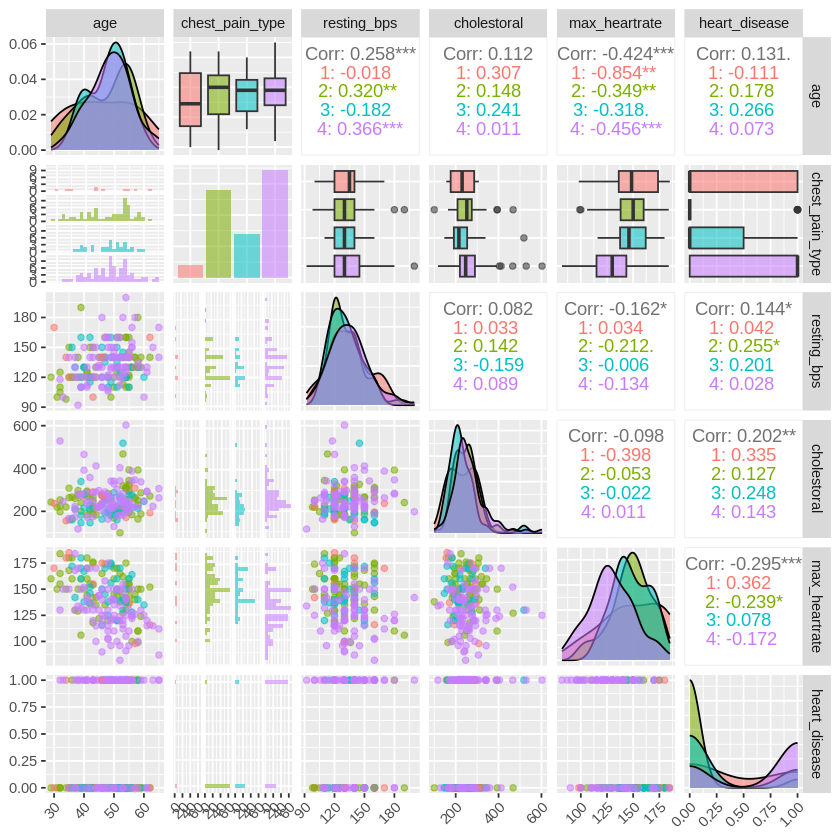

In [22]:
#Determining the correlation between predictors

data_ggpair <- hungry_training_2 |>
                    select(age, chest_pain_type, resting_bps, cholestoral, max_heartrate, heart_disease)

data_ggpair$chest_pain_type = as.factor(data_ggpair$chest_pain_type)

plot <- ggpairs(data_ggpair, aes(color = chest_pain_type, alpha = 0.5), cardinality_threshold = NULL, progress = FALSE) +
                        theme(axis.text.x = element_text(angle = 45, hjust = 1))
        

plot